## Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.




Things to ask
- do I need to reword the question?
- what are the variables?
- what type are the variables?
- formulate null hypothesis
- formulate alt hypothesis
- example of True Positive
- example of True Negative
- example of Type 1 error (False Positive)
- example of Type 2 error (False Negative)
- what type of tests should I run?

Has the network latency gone up since we switched internet service providers?

1.) Formulate a null hypothesis: There is no significant increase in network latency after changing providers.


variable:

- old_isp
- new_isp
- latency

2.) alternative hypothesis: There is a significant increase in network latency after changing newtwork providers.

3.) example of true positive: There is a significant increase in network latency after changing providers
- reject the null, H0 = False

4.) example of true negative: There is no significant increase in network latency after changing providers
 - accept the null, H0 = TRUE
 
 
5.) type I and type II errors would look like?

- Type 1: In type 1 we rejected the null hypothesis but the data indicates that there is no increase in network latency after switching to new provider. 


- Type II: In type 2 we accepted the null hypothesis but the data indicates that in fact there is a increase in network latency after switching to new provider.




### Is the website redesign any good?

1.) Formulate a null hypothesis: there is no significant increase in website activity since the redesigned website was implemented.


variables:
- old website = categorical/continious
- new_website = cetgorical/discrete

2.) alternative hypothesis: there is a significant increase in website activity since the redesigned website was implemented.

3.) example of true positive: There is a significant increase in website activity since redesign.
- reject the null, H0 = False

4.) example of true negative: There is no significant increase in network latency after changing providers
 - accept the null, H0 = TRUE
 
5.) type I and type II errors would look like?

Type 1: 
- In type 1 we rejected the null hypothesis: there is no significant increase in website activity for the redesigned website but the data indicates that there is no significant increase in web activity since the website was redesigned.

Type II: 
- In type 2 we accepted the null hypothesis: there is no significant increase in website activity for the redisgned website but the data indicates that there is no significnt increase in web activity since the redesign.



### Is our television ad driving more sales?



1.) Formulate a null hypothesis: the television ad has resulted in no significant increase in sales since it was implemented.

Variables:
sales_before
sales_after

2.) alternative hypothesis: the television ad has resulted in a significant increase in sales since it was implemented.

3.) example of true positive: There is a significant increase sales since the ad started playing.
- reject the null, H0 = False

4.) example of true negative: There is no significant increase in sales since the ad started playing
 - accept the null, H0 = TRUE
 
5.) type I and type II errors would look like?

Type 1: In type 1 we rejected the null hypothesis but the data indicates that there is a significnt increase in web activity.

Type II: In type 2 we accepted the null hypothesis,  but the data indicates that there is no significnt increase in web activity.



# Looking at the Teleco Database in Sequel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats
from pydataset import data

alpha = 0.05

### 1.) Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

#### a.) Does tenure correlate with monthly charges?

In [6]:
telco_df = pd.read_csv('Cust_Churn_Telco.csv')
telco_df.head()
telco_df = telco_df.dropna()

In [7]:
x = telco_df['tenure'].astype(float)
y = telco_df['MonthlyCharges'].astype(float)

(0.0, 500.0)

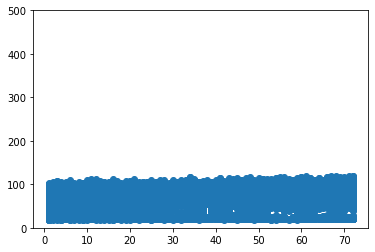

In [8]:
plt.scatter(x,y)
plt.ylim(0,500)


H0: there is no linear relationship between tenure and monthly charges.
Ha: there is a linear relationship between tenure and monthly charges.

In [9]:
r, p = stats.pearsonr(x,y)
r,p

(0.2468617666408935, 3.9898213232673846e-98)

#### p < alpha # we reject the null and accept the alternate

#### b.) total charges

In [10]:
# b.) total charges
#H0: there is no linear relationship between tenure and total charges.
#Ha: there is a linear relationship between tenure and total charges.
x = telco_df['tenure'].astype(float)
y = telco_df['TotalCharges'].astype(float)

(0.0, 500.0)

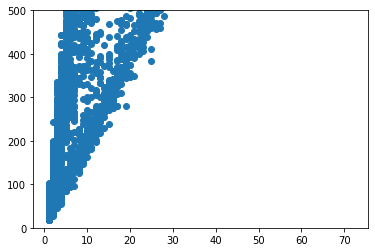

In [11]:
plt.scatter(x,y)
plt.ylim(0,500)

In [12]:
r, p = stats.pearsonr(x,y)
r,p

(0.825880460933202, 0.0)

#### p < alpha # we reject the null and accept the alternate

In [13]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### c.) What happens if you control for phone and internet service?

In [14]:
#has phone service
x = telco_df[telco_df.PhoneService == 'Yes'].tenure
y = telco_df[telco_df.PhoneService =='Yes'].MonthlyCharges


In [15]:
r, p = stats.pearsonr(x,y)
r,p

(0.24419396575193236, 6.82801603762022e-87)

In [16]:
# no phone service
x = telco_df[telco_df.PhoneService != 'Yes'].tenure
y = telco_df[telco_df.PhoneService !='Yes'].MonthlyCharges

r, p = stats.pearsonr(x,y)
r,p

(0.5924298640568985, 1.1732739032891836e-65)

In [17]:
#internet service 
x = telco_df[telco_df.InternetService != 'No'].tenure
y = telco_df[telco_df.InternetService !='No'].MonthlyCharges

In [18]:
r, p = stats.pearsonr(x,y)
r,p

(0.37203919761332416, 1.6186841401711697e-180)

In [19]:
#no internet service
x = telco_df[telco_df.InternetService == 'No'].tenure
y = telco_df[telco_df.InternetService =='No'].MonthlyCharges

In [20]:
r, p = stats.pearsonr(x,y)
r,p

(0.34618773548574655, 4.896604599951957e-44)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats
from pydataset import data

### 2.) Use the employees database


In [22]:
from env import host, user, password

def get_db_url(user, host, password, db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    

In [23]:
url_e = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [24]:
employees_db = pd.read_sql('SELECT * FROM employees', url_e)


- a.) Is there a relationship between how long an employee has been with the company and their salary?

In [47]:
employees_db.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [26]:
salaries_db = pd.read_sql('SELECT * FROM salaries', url_e)

title_db = pd.read_sql('SELECT * FROM titles', url_e)

In [27]:
employee_sal_db = employees_db.merge(salaries_db, how='inner')


In [28]:
employee_sal_db.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
5,10001,1953-09-02,Georgi,Facello,M,1986-06-26,71046,1991-06-25,1992-06-24
6,10001,1953-09-02,Georgi,Facello,M,1986-06-26,74333,1992-06-24,1993-06-24
7,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75286,1993-06-24,1994-06-24
8,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75994,1994-06-24,1995-06-24
9,10001,1953-09-02,Georgi,Facello,M,1986-06-26,76884,1995-06-24,1996-06-23


In [29]:
employee_sal_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   emp_no      int64 
 1   birth_date  object
 2   first_name  object
 3   last_name   object
 4   gender      object
 5   hire_date   object
 6   salary      int64 
 7   from_date   object
 8   to_date     object
dtypes: int64(2), object(7)
memory usage: 217.0+ MB


In [30]:
#datetime module
from datetime import date

In [31]:
# need to replacee 9999-01-01 to current date. Can use .replace
employee_sal_db['to_date'] = employee_sal_db['to_date'].replace(to_replace = employee_sal_db["to_date"].max(), value = date.today())

In [32]:
#used the above variable to change to_date 9999 to todays date..

In [33]:
employee_sal_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   emp_no      int64 
 1   birth_date  object
 2   first_name  object
 3   last_name   object
 4   gender      object
 5   hire_date   object
 6   salary      int64 
 7   from_date   object
 8   to_date     object
dtypes: int64(2), object(7)
memory usage: 217.0+ MB


In [75]:
employee_sal_db['tenure'] =  employee_sal_db.to_date - employee_sal_db.hire_date

In [76]:
employee_sal_db

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,365 days
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,730 days
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,1095 days
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,1460 days
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,1825 days
...,...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30,365 days
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30,730 days
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29,1095 days
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29,1460 days


In [77]:
employee_sal_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 10 columns):
 #   Column      Dtype          
---  ------      -----          
 0   emp_no      int64          
 1   birth_date  object         
 2   first_name  object         
 3   last_name   object         
 4   gender      object         
 5   hire_date   object         
 6   salary      int64          
 7   from_date   object         
 8   to_date     object         
 9   tenure      timedelta64[ns]
dtypes: int64(2), object(7), timedelta64[ns](1)
memory usage: 238.7+ MB


In [78]:
employee_sal_db_new = employee_sal_db.sort_values(by = 'to_date').groupby('emp_no').last()
employee_sal_db_new.head()

,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
emp_no,,,,,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,2021-05-12,12739 days
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,2021-05-12,12956 days
10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,2021-05-12,12676 days
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,2021-05-12,12581 days
10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,2021-05-12,11565 days


In [80]:
employee_sal_db_new['tenure'] = employee_sal_db_new.tenure.astype(str)

In [81]:
employee_sal_db_new.head(10)

,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
emp_no,,,,,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,2021-05-12,12739 days
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,2021-05-12,12956 days
10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,2021-05-12,12676 days
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,2021-05-12,12581 days
10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,2021-05-12,11565 days
10006,1953-04-20,Anneke,Preusig,F,1989-06-02,59755,2001-08-02,2021-05-12,11667 days
10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,88070,2002-02-07,2021-05-12,11779 days
10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,52668,2000-03-10,2000-07-31,2146 days
10009,1952-04-19,Sumant,Peac,F,1985-02-18,94409,2002-02-14,2021-05-12,13232 days


In [82]:
employee_sal_db_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 10001 to 499999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   birth_date  300024 non-null  object
 1   first_name  300024 non-null  object
 2   last_name   300024 non-null  object
 3   gender      300024 non-null  object
 4   hire_date   300024 non-null  object
 5   salary      300024 non-null  int64 
 6   from_date   300024 non-null  object
 7   to_date     300024 non-null  object
 8   tenure      300024 non-null  object
dtypes: int64(1), object(8)
memory usage: 22.9+ MB


In [83]:
employee_sal_db_new['tenure'] = employee_sal_db_new.tenure.str.strip('days').astype(int)

In [84]:
employee_sal_db_new.head(5)

,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
emp_no,,,,,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,2021-05-12,12739
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,2021-05-12,12956
10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,2021-05-12,12676
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,2021-05-12,12581
10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,2021-05-12,11565


In [85]:
new_df = employee_sal_db_new.drop(columns=['first_name', 'last_name', 'gender', 'from_date', 'birth_date'])

In [86]:
new_df.head()

,hire_date,salary,to_date,tenure
emp_no,,,,
10001,1986-06-26,88958,2021-05-12,12739
10002,1985-11-21,72527,2021-05-12,12956
10003,1986-08-28,43311,2021-05-12,12676
10004,1986-12-01,74057,2021-05-12,12581
10005,1989-09-12,94692,2021-05-12,11565


In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 10001 to 499999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   hire_date  300024 non-null  object
 1   salary     300024 non-null  int64 
 2   to_date    300024 non-null  object
 3   tenure     300024 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 11.4+ MB


In [87]:
# so finally have the data need to correlate

r, p = stats.pearsonr( new_df.tenure, new_df.salary)
r, p

(0.32494534670493935, 0.0)

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

### 3.) Use the sleepstudy data. Is there a relationship between days and reaction time?

CHI TEST EXERCISE

### 1.) Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [3]:
table = pd.read_csv('contingency_table.csv')

In [4]:
table

,Unnamed: 0,Codeup Student,No Codeup Student
0,Uses a Macbook,49,20
1,Doesn’t Use A Macbook,1,30


In [6]:
table = table.rename(columns={'Unnamed: 0' : ''})

In [43]:
contingency = pd.DataFrame({'codeup_student': [49,1], 'No_Codeup_Student': [20,30]}, index = ['Uses A MacBook', 'Doesnt Use A Macbook'])
contingency

,codeup_student,No_Codeup_Student
Uses A MacBook,49,20
Doesnt Use A Macbook,1,30


In [80]:
alpha = 0.05

In [81]:
chi2, p, degf, expected = stats.chi2_contingency(contingency)
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [82]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 8037 14999]
 [12174 22702]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [83]:
null_hypothesis = "there is no association between being a codeup student and having a macbook, they are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that there is no association between being a codeup student and having a macbook, they are independent


### 2.) Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [10]:
mpg = data('mpg')

In [22]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [24]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [15]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [ ]:
# manufacturer, class

In [39]:
observed = pd.crosstab(mpg.manufacturer, mpg.drv)
observed

drv,4,f,r
manufacturer,,,
audi,11,7,0
chevrolet,4,5,10
dodge,26,11,0
ford,13,0,12
honda,0,9,0
hyundai,0,14,0
jeep,8,0,0
land rover,4,0,0
lincoln,0,0,3


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(232.03448840753833,
 5.12809407673465e-34,
 28,
 array([[ 7.92307692,  8.15384615,  1.92307692],
        [ 8.36324786,  8.60683761,  2.02991453],
        [16.28632479, 16.76068376,  3.95299145],
        [11.0042735 , 11.32478632,  2.67094017],
        [ 3.96153846,  4.07692308,  0.96153846],
        [ 6.16239316,  6.34188034,  1.4957265 ],
        [ 3.52136752,  3.62393162,  0.85470085],
        [ 1.76068376,  1.81196581,  0.42735043],
        [ 1.32051282,  1.35897436,  0.32051282],
        [ 1.76068376,  1.81196581,  0.42735043],
        [ 5.72222222,  5.88888889,  1.38888889],
        [ 2.2008547 ,  2.26495726,  0.53418803],
        [ 6.16239316,  6.34188034,  1.4957265 ],
        [14.96581197, 15.4017094 ,  3.63247863],
        [11.88461538, 12.23076923,  2.88461538]]))

In [38]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[11  7  0]
 [ 4  5 10]
 [26 11  0]
 [13  0 12]
 [ 0  9  0]
 [ 0 14  0]
 [ 8  0  0]
 [ 4  0  0]
 [ 0  0  3]
 [ 4  0  0]
 [ 4  9  0]
 [ 0  5  0]
 [14  0  0]
 [15 19  0]
 [ 0 27  0]]
---
Expected

[[ 7  8  1]
 [ 8  8  2]
 [16 16  3]
 [11 11  2]
 [ 3  4  0]
 [ 6  6  1]
 [ 3  3  0]
 [ 1  1  0]
 [ 1  1  0]
 [ 1  1  0]
 [ 5  5  1]
 [ 2  2  0]
 [ 6  6  1]
 [14 15  3]
 [11 12  2]]
---

chi^2 = 232.0345
p     = 0.0000


In [79]:
null_hypothesis = "there is no association between manufacturer and drive type are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### 3.) Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

### a.) Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [50]:
from env import host, user, password

def get_db_url(user, host, password, db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
url_e = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [49]:
employees_db = pd.read_sql('SELECT * FROM employees', url_e)

In [65]:
query = '''
select de.emp_no, e.gender, d.dept_name from dept_emp as de
join employees as e ON de.emp_no = e.emp_no
join departments as d ON d.dept_no = de.dept_no
where de.to_date > now() and d.dept_name LIKE '%sales%' or d.dept_name LIKE '%marketing%';
'''

In [66]:
employee_df = pd.read_sql(query,url_e)
employee_df.head(10)

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10055,M,Marketing
2,10058,M,Marketing
3,10108,M,Marketing
4,10140,F,Marketing
5,10175,F,Marketing
6,10208,M,Marketing
7,10228,F,Marketing
8,10239,F,Marketing
9,10259,M,Marketing


In [67]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57912 entries, 0 to 57911
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emp_no     57912 non-null  int64 
 1   gender     57912 non-null  object
 2   dept_name  57912 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [84]:
observed = pd.crosstab(employee_df.gender, employee_df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,8037,14999
M,12174,22702


In [69]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.0012057333194741913,
 0.9723000856728293,
 1,
 array([[ 8039.44944053, 14996.55055947],
        [12171.55055947, 22704.44944053]]))

In [70]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 8037 14999]
 [12174 22702]]
---
Expected

[[ 8039 14996]
 [12171 22704]]
---

chi^2 = 0.0012
p     = 0.9723


In [76]:
null_hypothesis = "there is no association between gender and department, they are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### b.) Is an employee's gender independent of whether or not they are or have been a manager?

In [86]:
query = '''
SELECT CASE
	   WHEN emp_no IN (SELECT emp_no FROM dept_manager)
			THEN 'True'
	   ELSE 'False'
	END AS 'is_manager',
	emp_no, gender
FROM employees; '''



In [87]:
empl_df = pd.read_sql(query,url_e)
empl_df.head(10)

,is_manager,emp_no,gender
0,False,10001,M
1,False,10002,F
2,False,10003,M
3,False,10004,M
4,False,10005,M
5,False,10006,F
6,False,10007,F
7,False,10008,M
8,False,10009,F
9,False,10010,F


In [88]:
observed = pd.crosstab(empl_df.gender, empl_df.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [89]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(1.4566857643547197,
 0.22745818732810363,
 1,
 array([[1.20041397e+05, 9.60331174e+00],
        [1.79958603e+05, 1.43966883e+01]]))

In [90]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [91]:
null_hypothesis = "there is no association between gender and being a dept_manager, they are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
